# Explore here

In [73]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
import json

In [4]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Exploración y limpieza

In [5]:
print(" The total number of rows in the dataset is: ", total_data.shape)
print("--------------------")
total_data.info()

 The total number of rows in the dataset is:  (48895, 16)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_revi

Conclusiones:

1) El Dataframe contiente 38821 filas (registros) y 16 columnas (Variables)
2) Analizando la información disponible, se identifica la presencia de algunos valores NaN, principalmente en las columnas last_review y reviews_per_month, que presentan la mayor cantidad de datos ausentes.

En cuanto a la clasificación de los datos:

* Características categóricas (8 en total): incluyen identificadores, nombres de anfitriones y ubicaciones, así como el tipo de habitación y la disponibilidad anual.

* Características numéricas (8 en total): abarcan coordenadas geográficas, costos, duración mínima de estadía, cantidad de reseñas y otros indicadores relacionados con la actividad de los anfitriones.

### Quitar Duplicados

In [6]:
print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


### Eliminar información irrelevante

In [7]:
total_data.drop(["id", "name", "host_name", "reviews_per_month" , "last_review", "longitude", "latitude"], axis = 1, inplace = True)
total_data.head()

host_id neighbourhood_group neighbourhood        room_type  price  \
0     2787            Brooklyn    Kensington     Private room    149   
1     2845           Manhattan       Midtown  Entire home/apt    225   
2     4632           Manhattan        Harlem     Private room    150   
3     4869            Brooklyn  Clinton Hill  Entire home/apt     89   
4     7192           Manhattan   East Harlem  Entire home/apt     80   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  9                               6   
1               1                 45                               2   
2               3                  0                               1   
3               1                270                               1   
4              10                  9                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

## Análisis de variables Univariadas

### Varbiables categóricas

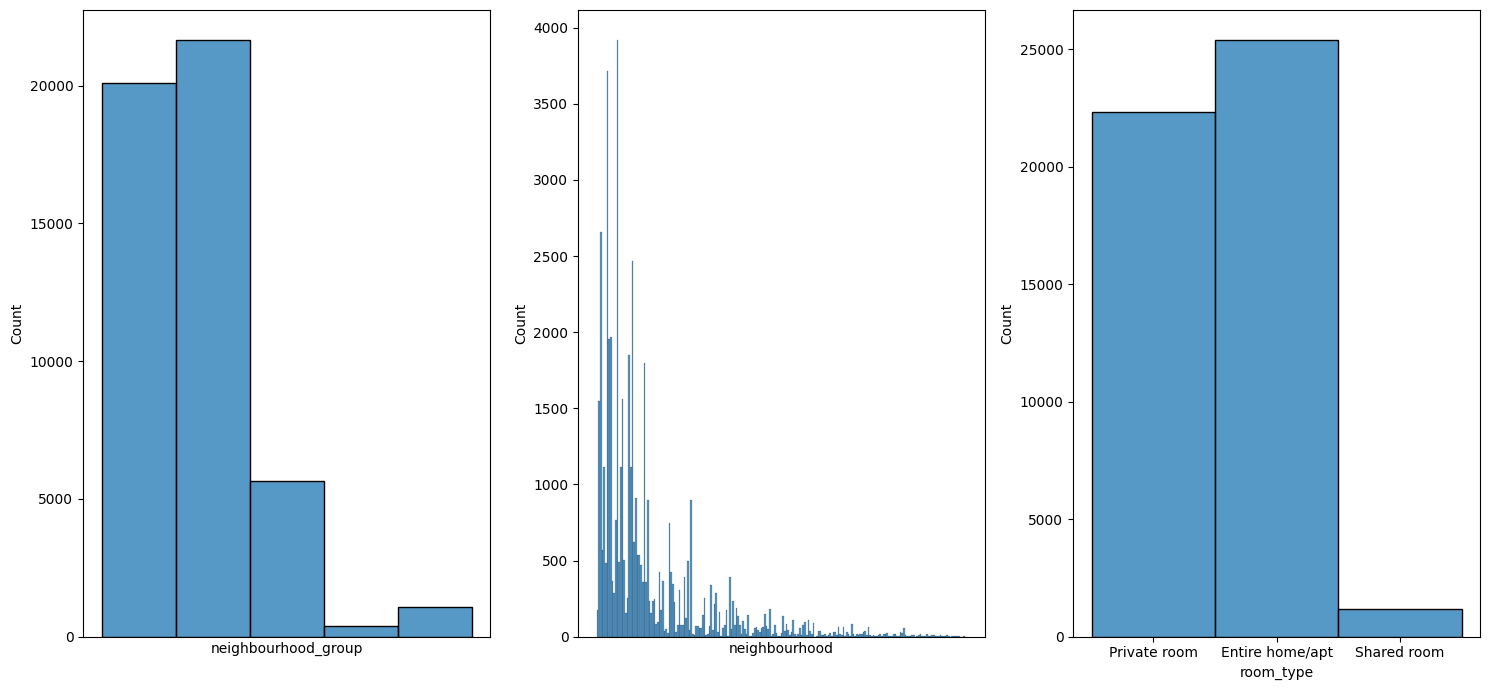

In [55]:
fig, axis = plt.subplots(1, 3, figsize=(15, 7))

# Crear histograma

sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[1], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[2], data = total_data, x = "room_type")

# Ajustar y mostrar gráficos
plt.tight_layout()
plt.show()

Conclusiones:

A partir del análisis gráfico, se pueden extraer las siguientes conclusiones:

* Existen múltiples anfitriones que ofrecen varias habitaciones en alquiler. Sin embargo, se observa una cantidad significativa de valores NaN en la columna host_id.

* El conjunto de datos abarca únicamente las cinco áreas principales de Nueva York: Brooklyn, Manhattan, Queens, Staten Island y el Bronx, lo que confirma que el análisis se centra exclusivamente en esta ciudad.

* Algunos barrios tienen una mayor concentración de ofertas de Airbnb en comparación con otros.

* Los alojamientos más comunes son casas/apartamentos enteros, seguidos por habitaciones privadas, mientras que las habitaciones compartidas son la opción menos disponible.


### Variables Numéricas

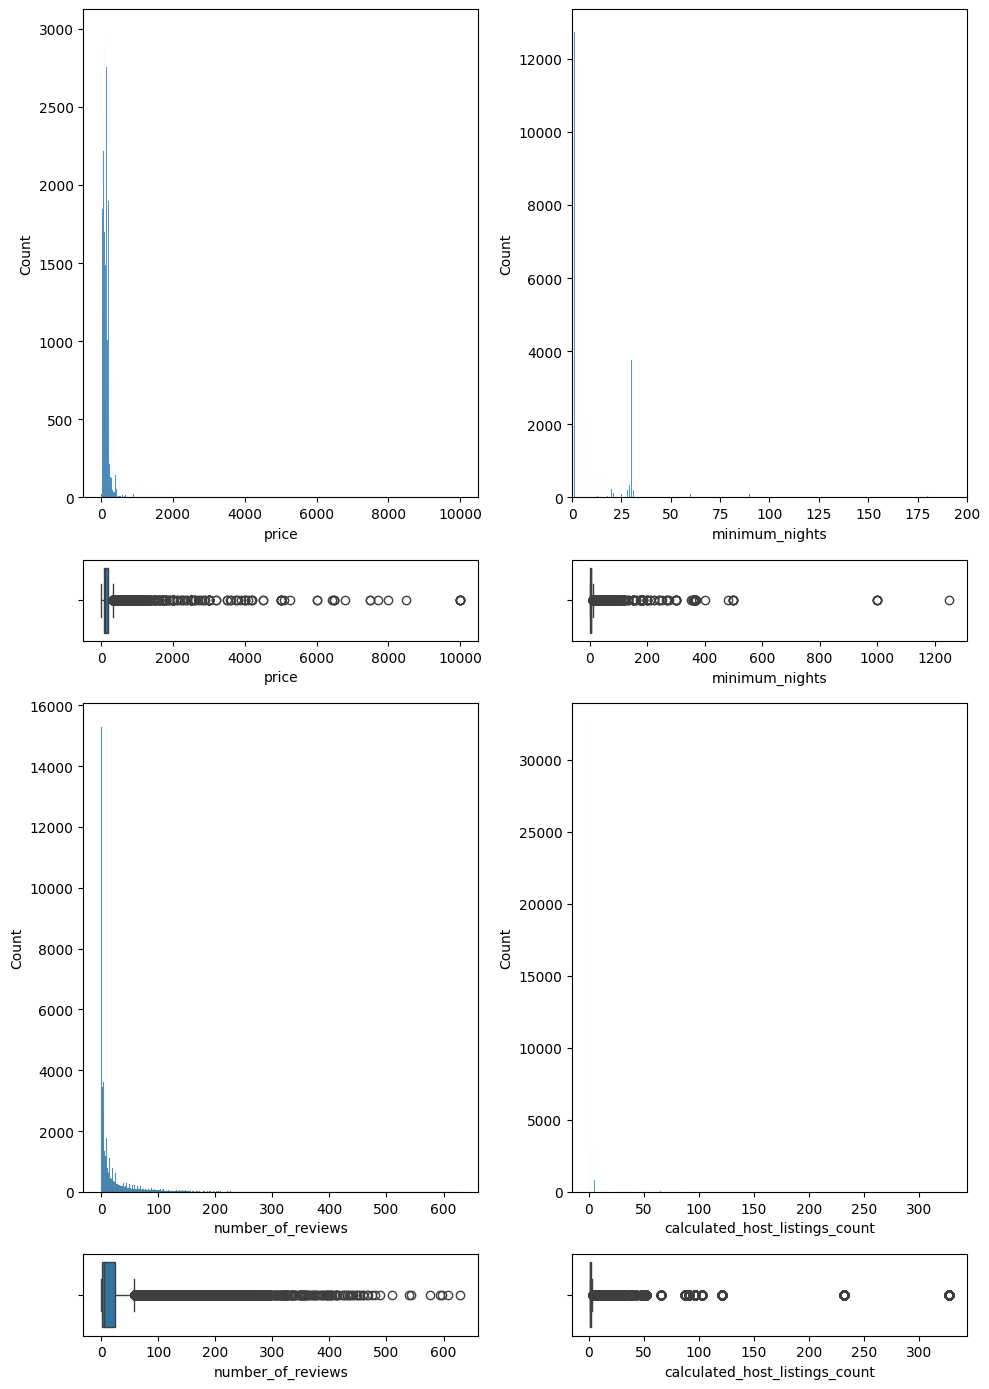

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

plt.tight_layout()
plt.show()

Conclusiones:

1) price: La mayoría de las propiedades tienen precios bajos, pero algunos valores extremos indican propiedades de lujo o muy exclusivas.

2) minimum_nights: La mayoría de las propiedades tienen requisitos bajos de noches mínimas, lo que las hace atractivas para turistas que buscan estancias cortas, aunque algunas propiedades requieren un mínimo alto de noches.

3) number_of_reviews: La mayoría de las propiedades tienen pocas reseñas, pero algunas propiedades populares tienen un gran número de reseñas, lo que refleja su alta demanda.

4) calculated_host_listings_count: La mayoría de los anfitriones gestionan solo una propiedad, pero algunos anfitriones tienen muchas propiedades, lo que sugiere una operación más comercial.


## Análisis de variables multivariante

### Numérico-numérico

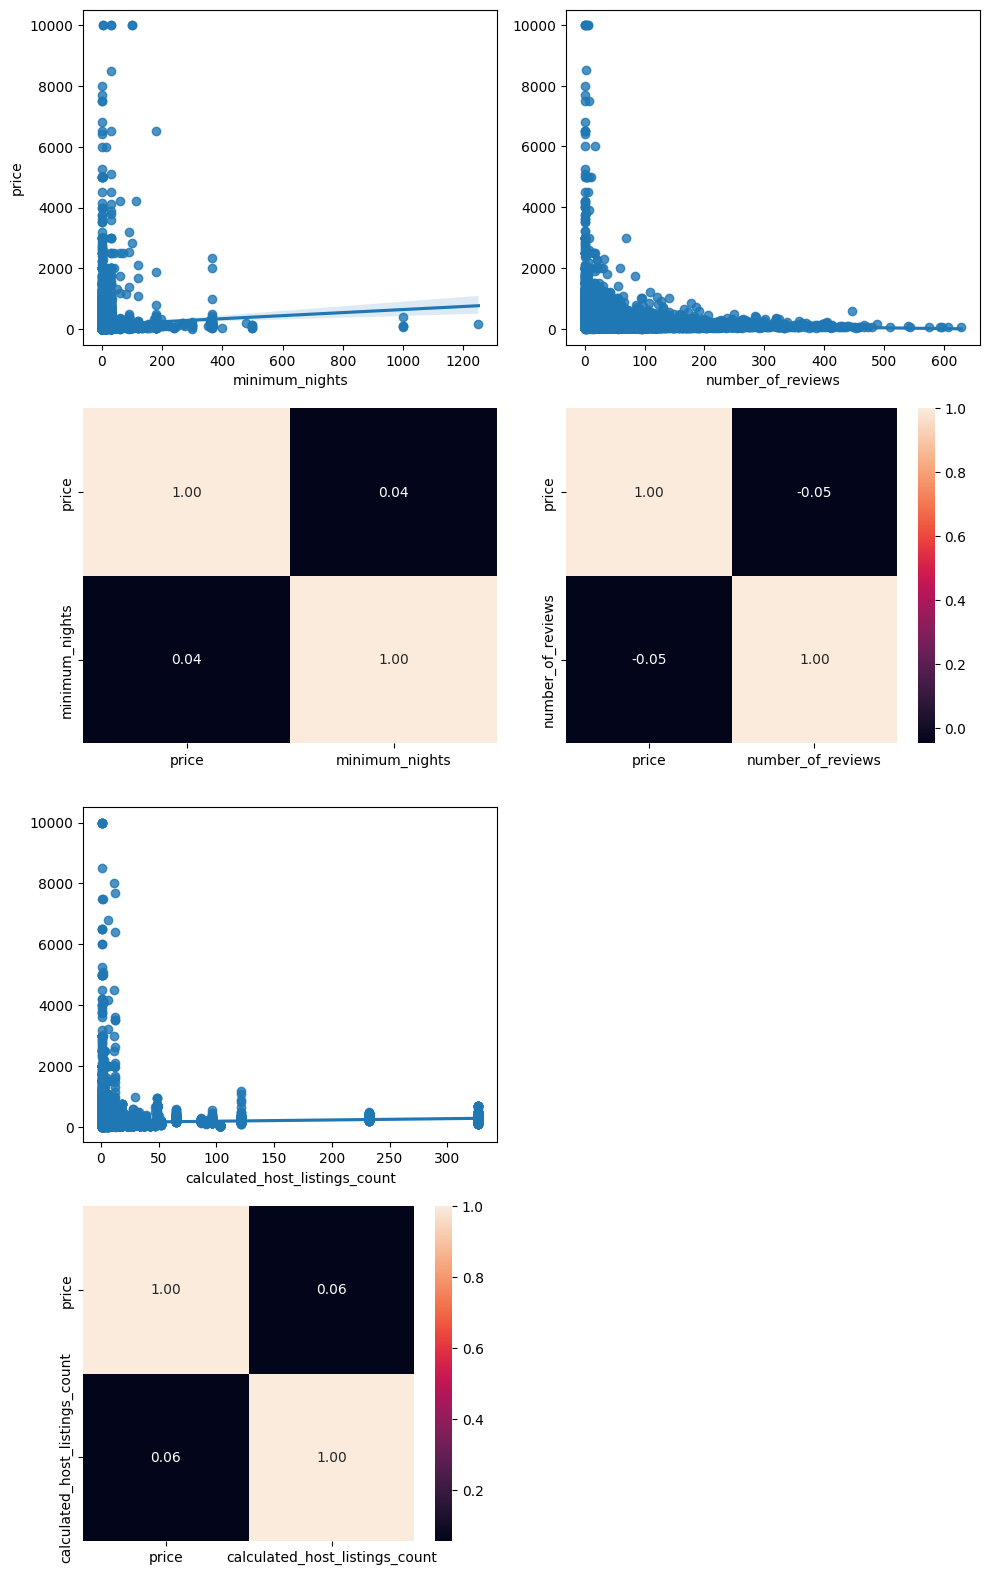

In [10]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

Conclusiones:

A partir de los valores de correlación, observamos que:

* El precio y el número mínimo de noches no tienen relación significativa.
* El número de reseñas y el precio tampoco muestran una correlación clara.

### Categótico-categórico

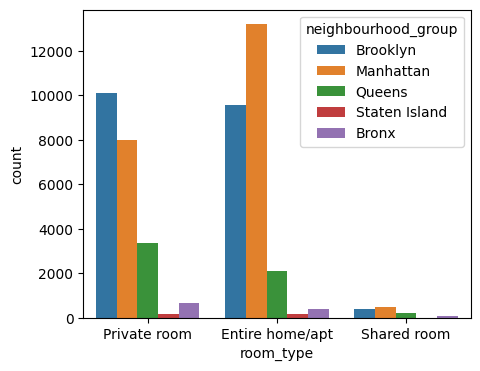

In [11]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")
plt.show()

Conclusiones:

* Manhattan tiene la mayor cantidad de alojamientos y la mayor oferta de casas/apartamentos completos.

* Brooklyn, en segundo lugar, cuenta con más habitaciones privadas, lo que sugiere que más personas comparten su hogar o buscan optimizar el espacio.

* Queens y el Bronx siguen la misma tendencia que Brooklyn.

* Staten Island tiene muy poca presencia en Airbnb.

* No hay una relación fuerte entre el tipo de habitación y el barrio, más allá de estas tendencias generales.

### Combinaciones de la clase con varias predictoras

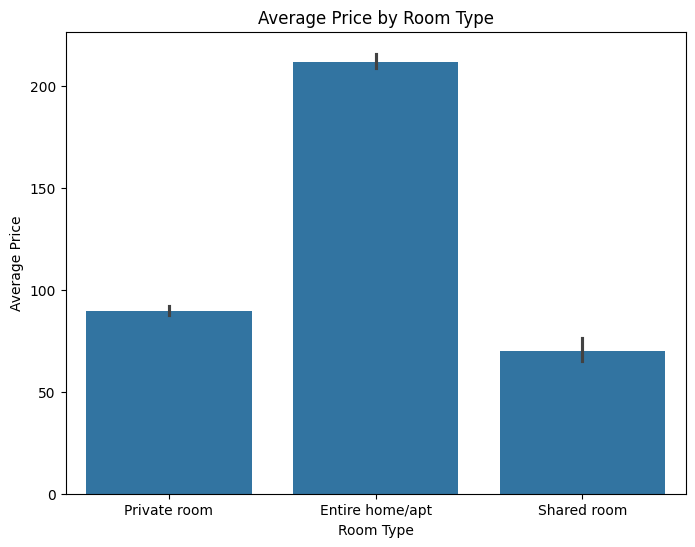

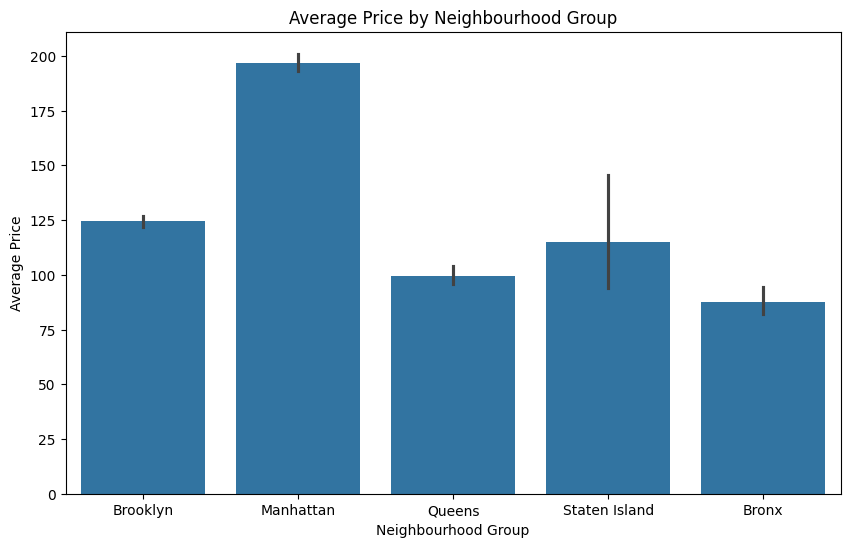

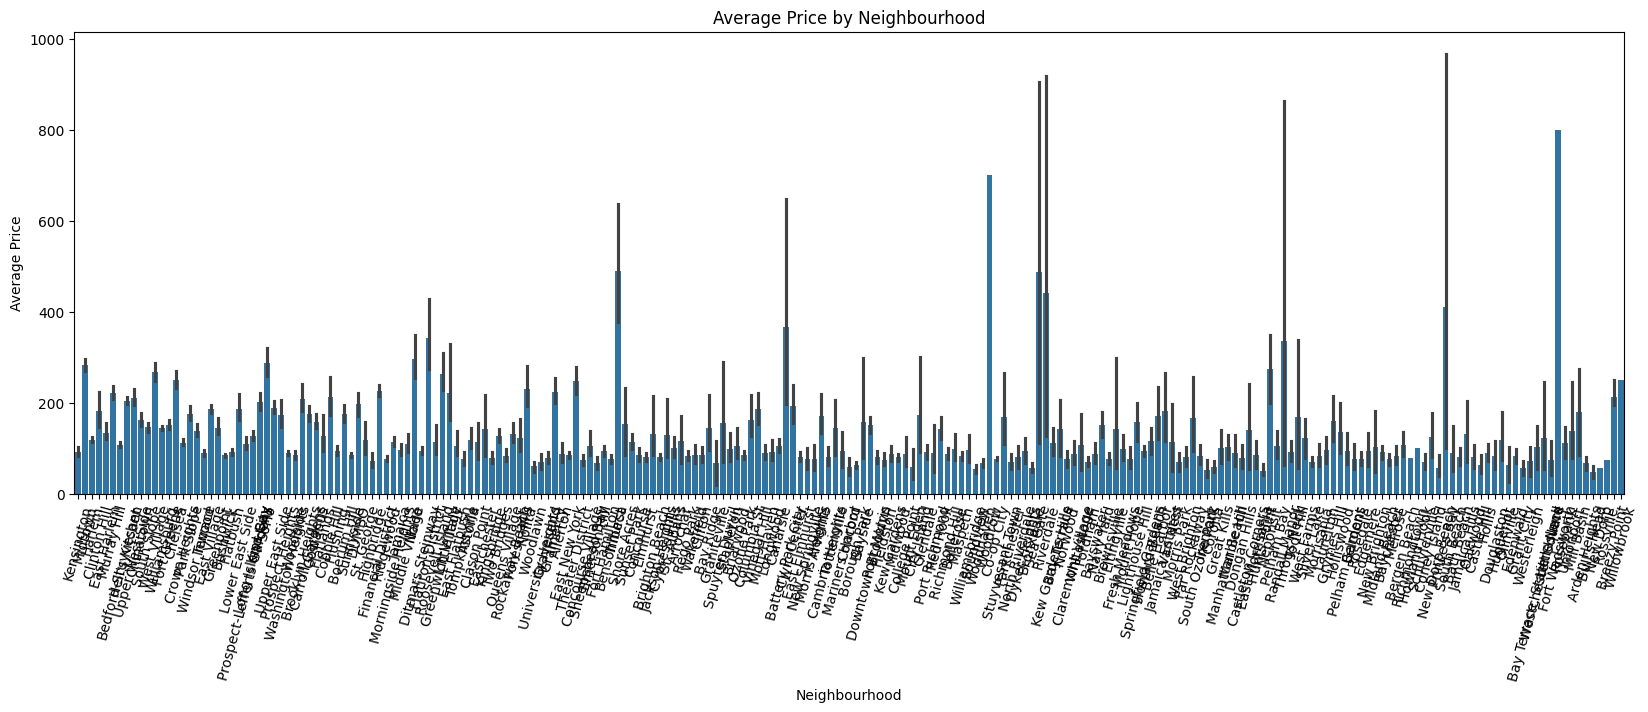

In [12]:
# Gráfico de barras para la relación entre 'room_type' y 'price'
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=total_data)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

# Gráfico de barras para la relación entre 'neighbourhood_group' y 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=total_data)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

# Gráfico de barras para la relación entre 'neighbourhood' y 'price'
plt.figure(figsize=(20, 6))
sns.barplot(x='neighbourhood', y='price', data=total_data)
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=75)
plt.show()


Conclusiones basadas en los gráficos:

1) room_type y price:
	* Las propiedades completas (Entire home/apt) son las más caras debido a su tamaño y privacidad.
	* Las habitaciones privadas (Private room) tienen precios intermedios.
	* Las habitaciones compartidas (Shared room) son las más baratas debido a la falta de privacidad.

Conclusión: El tipo de habitación impacta significativamente el precio. Las propiedades completas son mucho más caras.

2) neighbourhood_group y price:
	* Manhattan tiene los precios más altos, seguido por Brooklyn y Queens.
	* Staten Island tiene precios más bajos debido a su lejanía de zonas turísticas.

Conclusión: La ubicación es clave. Zonas más centrales (Manhattan) tienen precios más altos, mientras que las periféricas (Staten Island) son más económicas.

3) neighbourhood y price:
	* Zonas centrales y turísticas (como Manhattan, Brooklyn, Central Park): Los precios en estos barrios son generalmente más altos debido a la alta demanda y la proximidad a los puntos turísticos y comerciales.
	* Barrios más alejados o residenciales (como Jamaica, East Village): Los precios son más bajos, ya que la demanda de alojamiento no es tan alta en comparación con las áreas centrales.

Conclusión: Los precios son generalmente más altos en los barrios más turísticos y céntricos, como Manhattan y Brooklyn, mientras que los barrios periféricos tienden a tener precios más bajos.

### Análisis de correlaciones

In [13]:
# Asignar valores numéricos a las columnas para usar en los gráficos

total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]


room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for _, row in total_data[["room_type", "room_type_n"]].drop_duplicates().iterrows()}
import json

with open("room_type_tranformation_rules.json", "w") as f:
  json.dump(room_type_transformation_rules, f)

neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for _, row in total_data[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()}
import json

with open("neighbourhood_group_tranformation_rules.json", "w") as f:
  json.dump(neighbourhood_group_transformation_rules, f)

neighbourhood_transformation_rules = {row["neighbourhood"]: row["neighbourhood_n"] for _, row in total_data[["neighbourhood", "neighbourhood_n"]].drop_duplicates().iterrows()}
import json

with open("neighbourhood_tranformation_rules.json", "w") as f:
  json.dump(neighbourhood_transformation_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:

# with open("Sex_transformation_rules.json", "r") as f:
#  sex_transformation_rules = json.load(f)

# total_data["Sex_n"] = total_data["Sex"].apply(lambda x: sex_transformation_rules[x])


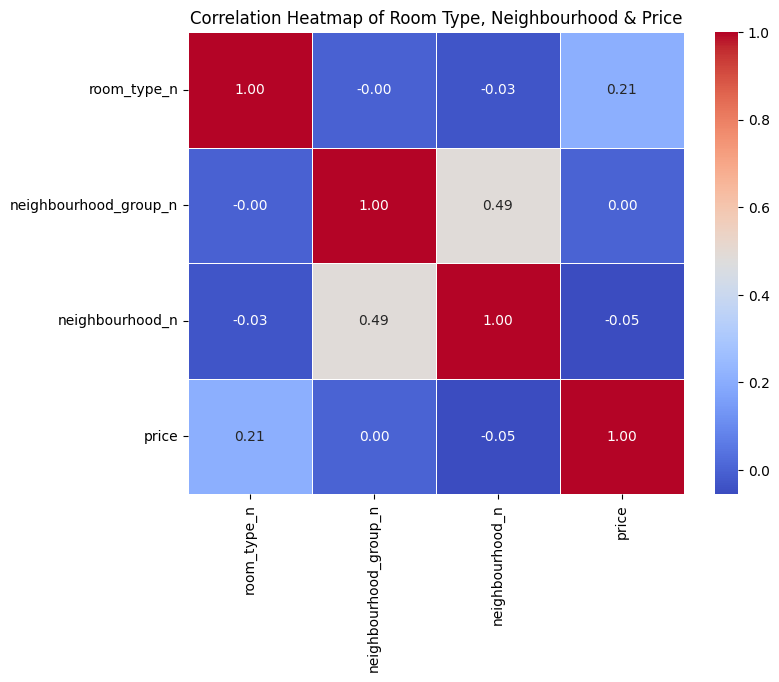

In [14]:

# Crear la matriz de correlación
corr_matrix = total_data[["room_type_n", "neighbourhood_group_n", "neighbourhood_n", "price"]].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title("Correlation Heatmap of Room Type, Neighbourhood & Price")

# Mostrar el gráfico
plt.show()

Conclusiones del Análisis de Correlaciones:

1.	Room Type vs. Price (0.21): Existe una correlación positiva baja entre el tipo de habitación y el precio. Esto indica que algunos tipos de habitaciones pueden tener precios más altos, pero la relación no es fuerte.

2.	Neighbourhood Group vs. Price (0.00): No hay una relación significativa entre el grupo de vecindario y el precio, lo que sugiere que el precio puede depender más de otros factores como la oferta específica en cada vecindario.

3.	Neighbourhood vs. Price (-0.05): La correlación es muy baja y negativa, lo que implica que la ubicación específica dentro de un grupo de vecindarios no tiene un impacto claro en el precio.

4.	Neighbourhood Group vs. Neighbourhood (0.49): Hay una correlación moderada entre el grupo de vecindario y el vecindario, lo cual es esperable, ya que los vecindarios pertenecen a grupos más grandes.

En general, el precio parece estar más influenciado por el tipo de habitación que por la ubicación dentro de los vecindarios.

### Categórico-numérico

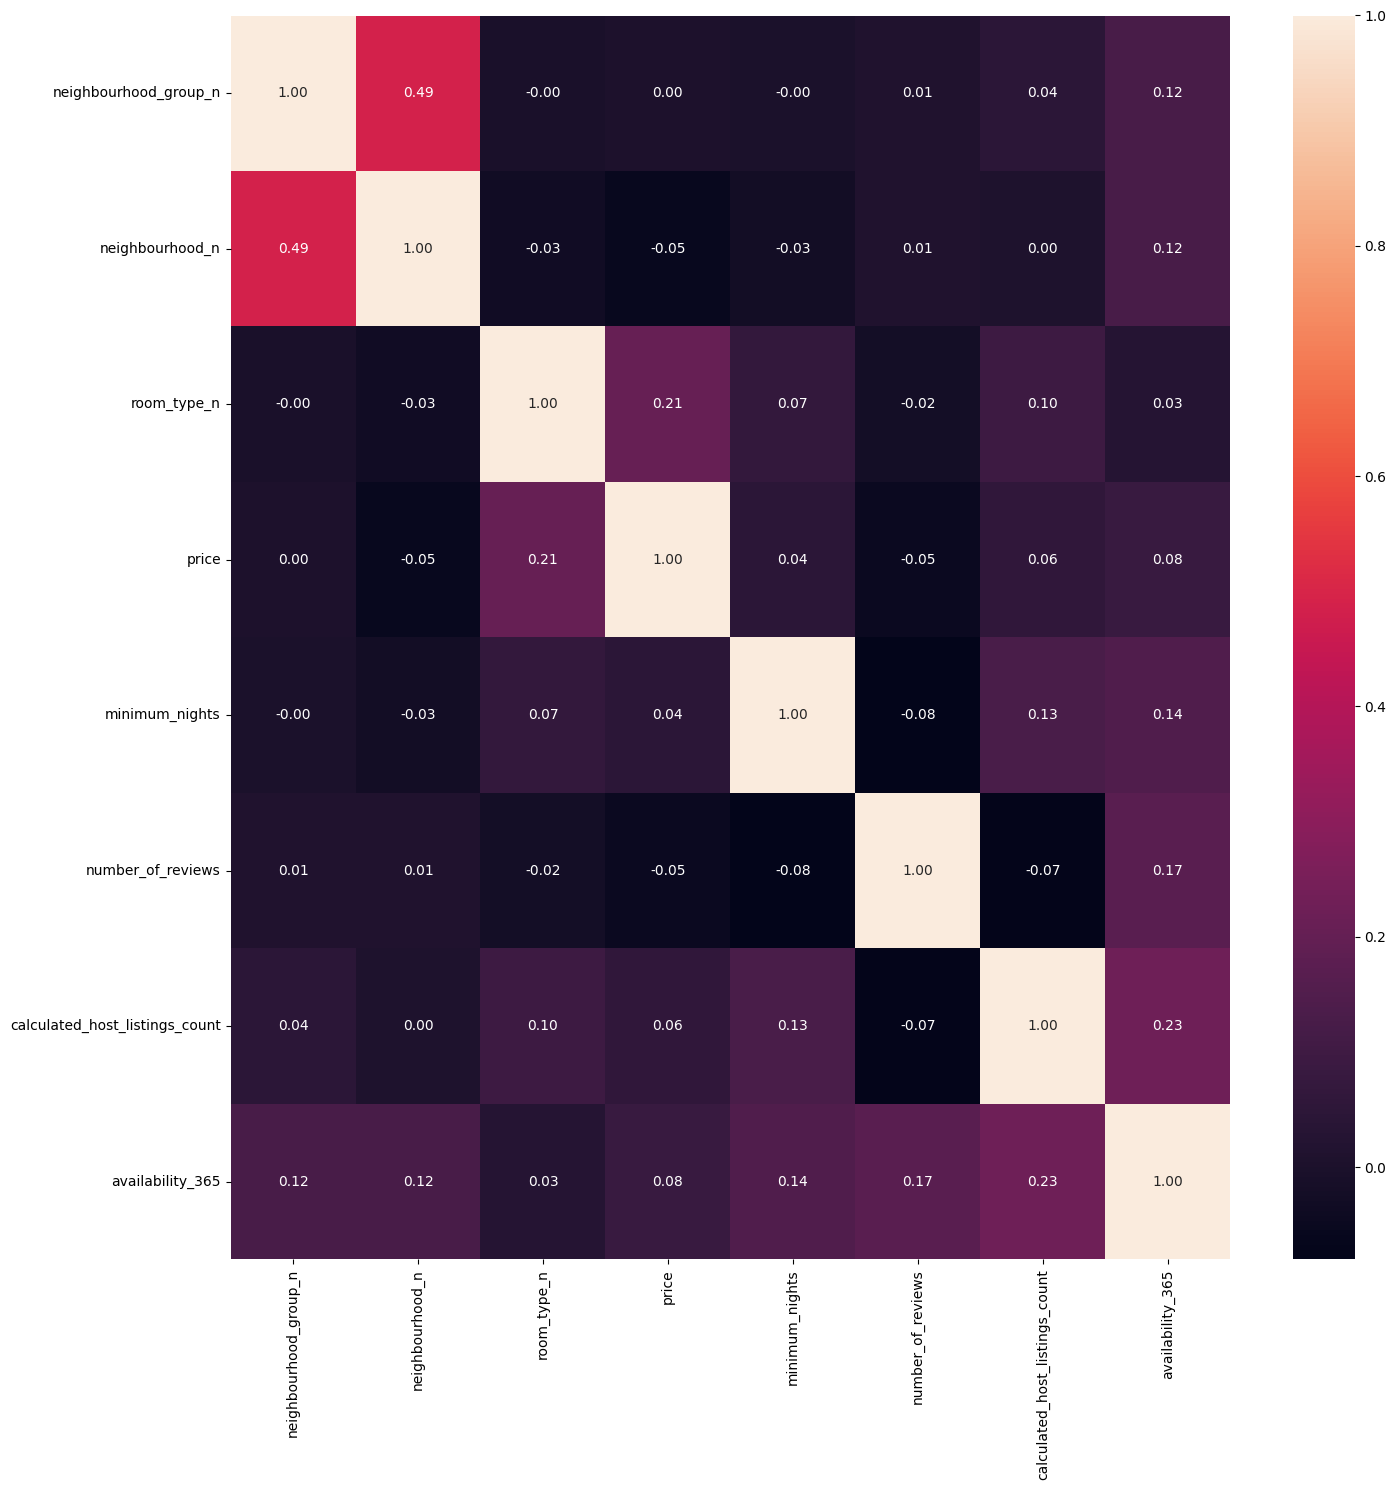

In [15]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Conclusiones sobre la Correlación

* La correlación entre las variables es muy baja en general.
* Los anfitriones con más listados suelen tener mayor disponibilidad.
* Fuera de esta tendencia, no se observan relaciones claras entre las variables.

## Análisis de toda la data en una

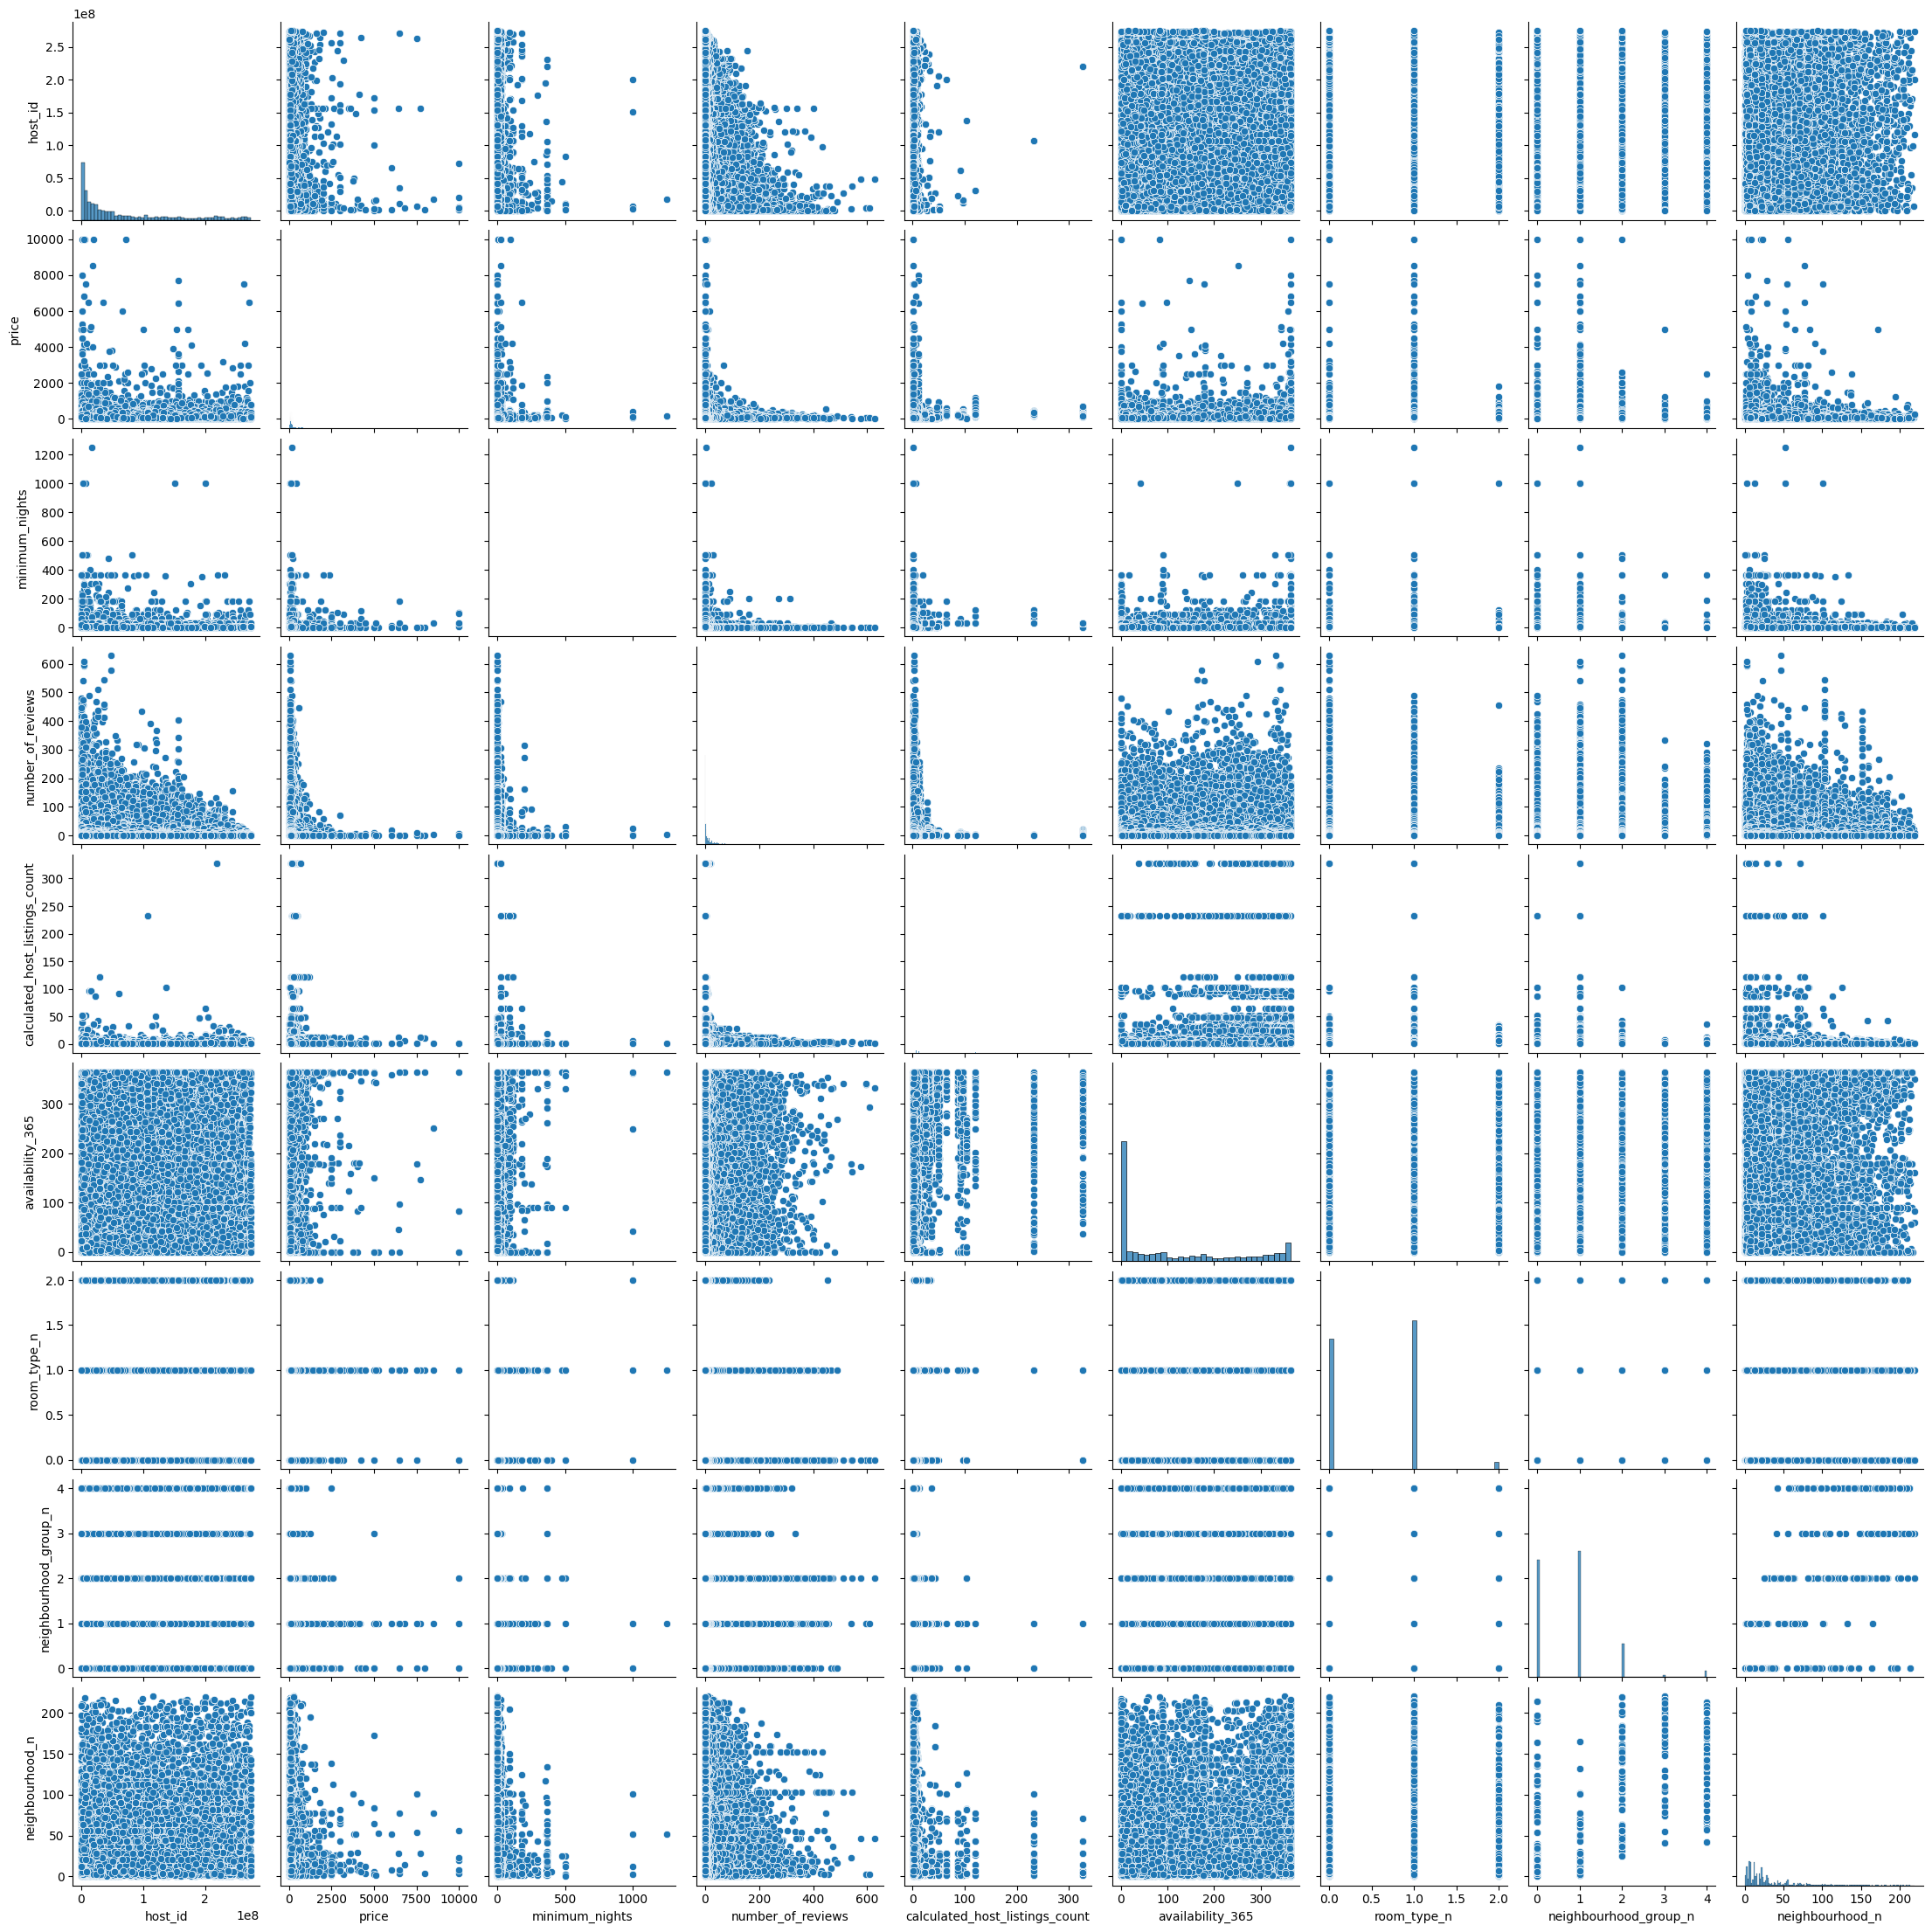

In [16]:
sns.pairplot(data = total_data)

## Feature Engineering

### Análisis Outliers

In [17]:
total_data.describe()

host_id         price  minimum_nights  number_of_reviews  \
count  4.889500e+04  48895.000000    48895.000000       48895.000000   
mean   6.762001e+07    152.720687        7.029962          23.274466   
std    7.861097e+07    240.154170       20.510550          44.550582   
min    2.438000e+03      0.000000        1.000000           0.000000   
25%    7.822033e+06     69.000000        1.000000           1.000000   
50%    3.079382e+07    106.000000        3.000000           5.000000   
75%    1.074344e+08    175.000000        5.000000          24.000000   
max    2.743213e+08  10000.000000     1250.000000         629.000000   

       calculated_host_listings_count  availability_365   room_type_n  \
count                    48895.000000      48895.000000  48895.000000   
mean                         7.143982        112.781327      0.567113   
std                         32.952519        131.622289      0.541249   
min                          1.000000          0.000000      0.000000   
25%                          1.000000          0.000000      0.000000   
50%                          1.000000         45.000000      1.000000   
75%                          2.000000        227.000000      1.000000   
max                        327.000000        365.000000      2.000000   

       neighbourhood_group_n  neighbourhood_n  
count           48895.000000     48895.000000  
mean                0.786911        29.888782  
std                 0.844386        34.676634  
min                 0.000000         0.000000  
25%                 0.000000         7.500000  
50%                 1.000000        19.000000  
75%                 1.000000        37.000000  
max                 4.000000       220.000000

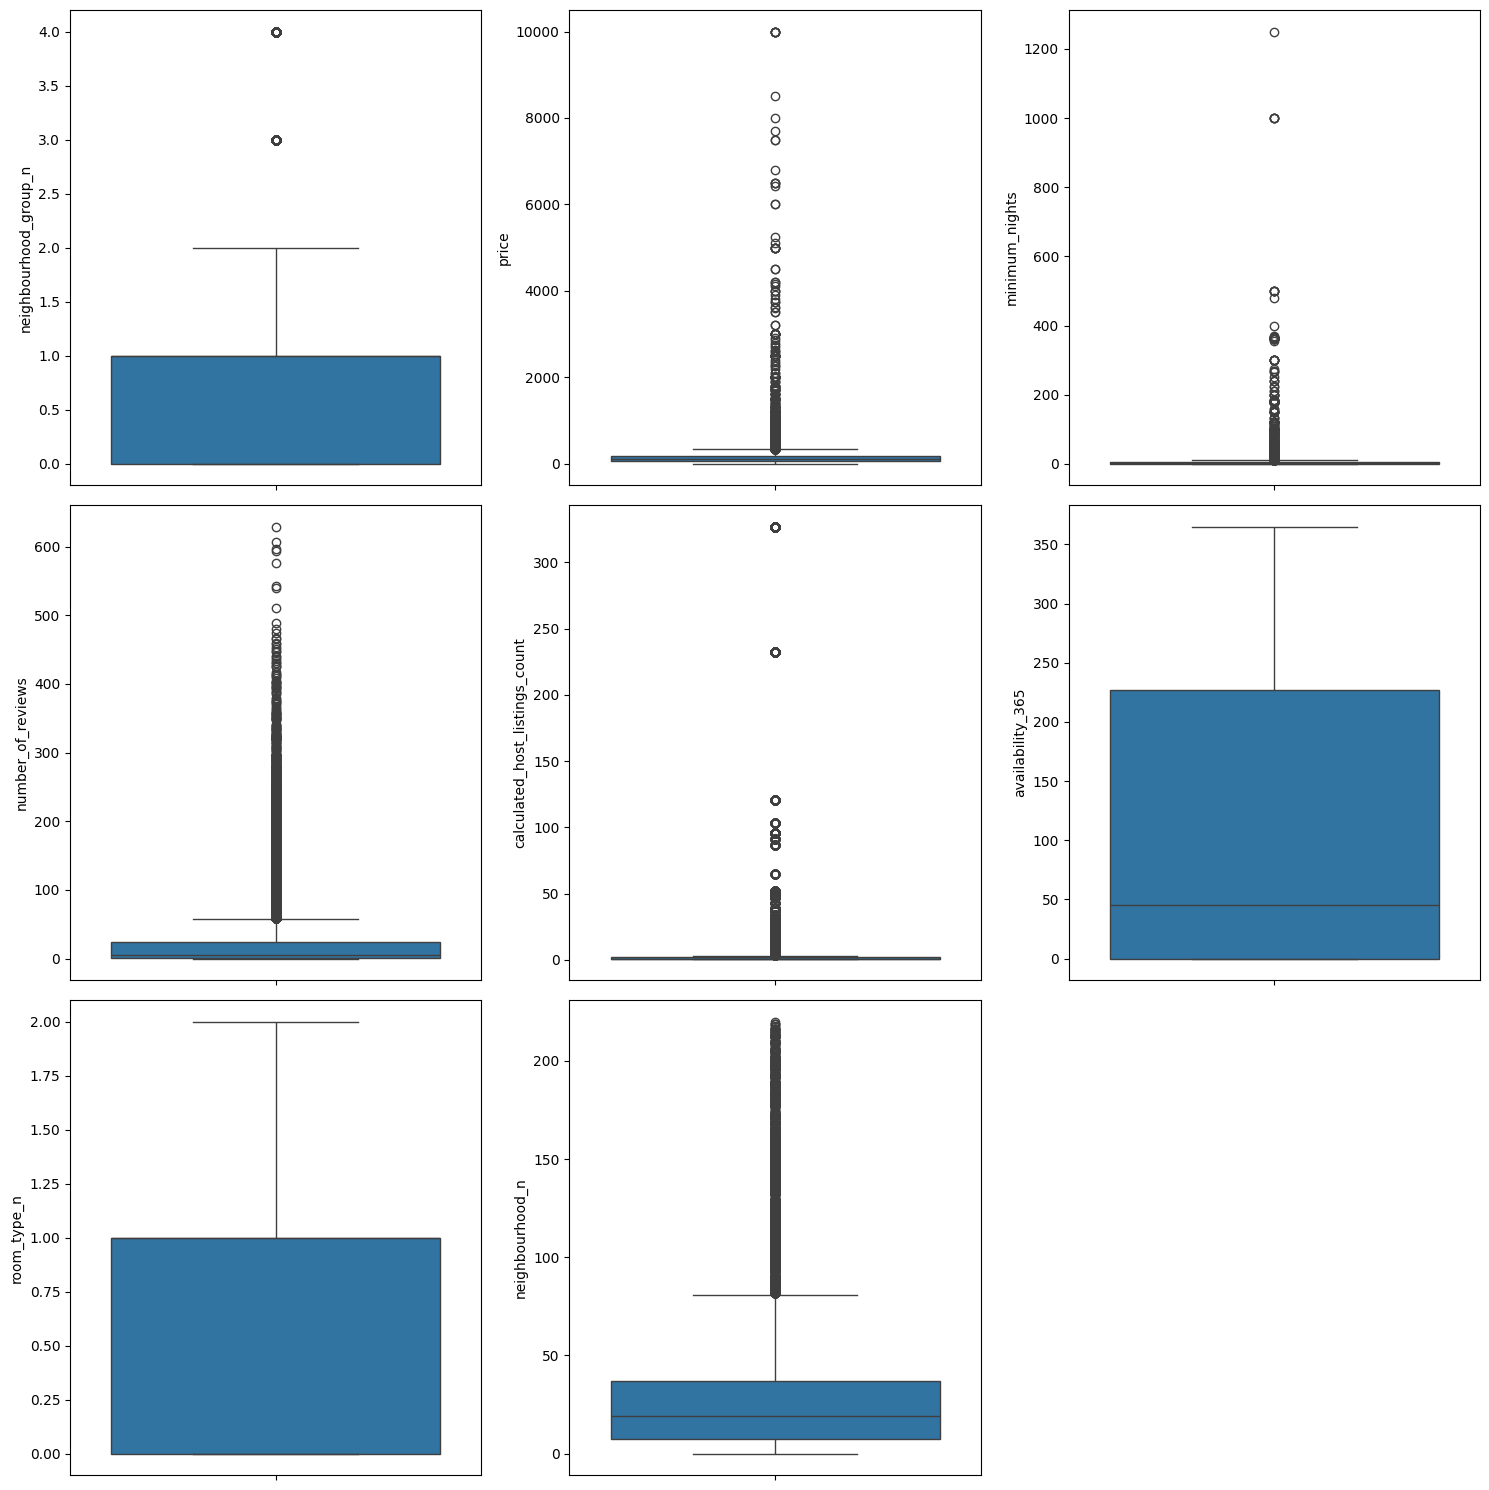

In [18]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group_n")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type_n")
sns.boxplot(ax = axes[2, 1], data = total_data, y = "neighbourhood_n")
fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

In [57]:
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers(column, df):
    colum_stats = df[column].describe()
    IQR = colum_stats["75%"] - colum_stats["25%"]
    lower_bound = colum_stats["25%"] - 1.5 * IQR
    upper_bound = colum_stats["75%"] + 1.5 * IQR
    if lower_bound < 0: lower_bound = min(df[column])
    #remove upper outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    #remove lower outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return df.copy(), [lower_bound, upper_bound]

outliers_dict = {}
for column in ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]:
    total_data_sin_outliers, limit_list = replace_outliers(column, total_data_sin_outliers)
    # Convertir los límites de np.float64 a float nativo de Python
    outliers_dict[column] = [float(limit) for limit in limit_list] 

with open("outliers_dict.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'price': [0.0, 334.0],
 'minimum_nights': [1.0, 11.0],
 'number_of_reviews': [0.0, 58.5],
 'calculated_host_listings_count': [1.0, 3.5],
 'availability_365': [0.0, 567.5]}

In [20]:
total_data_sin_outliers

host_id neighbourhood_group       neighbourhood        room_type  \
0          2787            Brooklyn          Kensington     Private room   
1          2845           Manhattan             Midtown  Entire home/apt   
2          4632           Manhattan              Harlem     Private room   
3          4869            Brooklyn        Clinton Hill  Entire home/apt   
4          7192           Manhattan         East Harlem  Entire home/apt   
...         ...                 ...                 ...              ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant     Private room   
48891   6570630            Brooklyn            Bushwick     Private room   
48892  23492952           Manhattan              Harlem  Entire home/apt   
48893  30985759           Manhattan      Hell's Kitchen      Shared room   
48894  68119814           Manhattan      Hell's Kitchen     Private room   

       price  minimum_nights  number_of_reviews  \
0      149.0             1.0                9.0   
1      225.0             1.0               45.0   
2      150.0             3.0                0.0   
3       89.0             1.0               58.5   
4       80.0            10.0                9.0   
...      ...             ...                ...   
48890   70.0             2.0                0.0   
48891   40.0             4.0                0.0   
48892  115.0            10.0                0.0   
48893   55.0             1.0                0.0   
48894   90.0             7.0                0.0   

       calculated_host_listings_count  availability_365  room_type_n  \
0                                 3.5               365            0   
1                                 2.0               355            1   
2                                 1.0               365            0   
3                                 1.0               194            1   
4                                 1.0                 0            1   
...                               ...               ...          ...   
48890                             2.0                 9            0   
48891                             2.0                36            0   
48892                             1.0                27            1   
48893                             3.5                 2            2   
48894                             1.0                23            0   

       neighbourhood_group_n  neighbourhood_n  
0                          0                0  
1                          1                1  
2                          1                2  
3                          0                3  
4                          1                4  
...                      ...              ...  
48890                      0                6  
48891                      0               21  
48892                      1                2  
48893                      1                7  
48894                      1                7  

[48895 rows x 12 columns]

## Anáisis de valores faltantes

In [58]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)


host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64

In [59]:
# Ver
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
room_type_n                       0.0
neighbourhood_group_n             0.0
neighbourhood_n                   0.0
dtype: float64

## Inferencia de nuevas caraterísticas

No hay columnas en el DF que pueda aplicarse para la inferencia de nuevas características

## Feature Scalling

In [60]:
num_variables  = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group_n", "room_type_n", "neighbourhood_n"]

x_con_outliers = total_data_con_outliers.drop("price", axis = 1)[num_variables]
x_sin_outliers = total_data_sin_outliers.drop("price", axis = 1)[num_variables]
y = total_data_con_outliers["price"]

x_train_con_outliers, x_test_con_outliers, y_train, y_test = train_test_split(x_con_outliers, y, test_size = 0.2, random_state = 42)
x_train_sin_outliers, x_test_sin_outliers = train_test_split(x_sin_outliers, test_size = 0.2, random_state = 42)

#Guardar los Datasets, ruta "/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/"

x_train_con_outliers.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/x_train_con_outliers.xlsx", index = False)
x_test_con_outliers.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/x_test_con_outliers.xlsx", index = False)
x_train_sin_outliers.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/x_train_sin_outliers.xlsx", index = False)
x_test_sin_outliers.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/x_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/y_test.xlsx", index = False)

x_train_con_outliers.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
32645                 11               3                               1   
23615                  2               2                               1   
31183                  0               2                               2   
29260                 87               3                               1   
7275                  13               5                               1   
...                  ...             ...                             ...   
11284                  0               1                               1   
44732                  4               2                               1   
38158                  1              30                               5   
860                   11               2                               1   
15795                  1               5                               1   

       availability_365  neighbourhood_group_n  room_type_n  neighbourhood_n  
32645                 1                      0            1               12  
23615                 0                      1            0               30  
31183                 0                      0            0                6  
29260               267                      0            1                6  
7275                  0                      2            0               31  
...                 ...                    ...          ...              ...  
11284                 0                      1            2               30  
44732                76                      1            0               14  
38158               261                      1            1                8  
860                   2                      1            1                8  
15795                 0                      2            1               25  

[39116 rows x 7 columns]

### Normalización

In [69]:
#Normalizar dataframes con outliers y guardar

normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(x_train_con_outliers)

with open("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(x_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = x_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(x_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = x_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(x_train_sin_outliers)

with open("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(x_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = x_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(x_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = x_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
32645          -0.277198       -0.193025                       -0.186570   
23615          -0.479451       -0.239596                       -0.186570   
31183          -0.524396       -0.239596                       -0.156424   
29260           1.430714       -0.193025                       -0.186570   
7275           -0.232253       -0.099884                       -0.186570   

       availability_365  neighbourhood_group_n  room_type_n  neighbourhood_n  
32645         -0.852862              -0.931915     0.798949        -0.514100  
23615         -0.860447               0.256169    -1.050482         0.005517  
31183         -0.860447              -0.931915    -1.050482        -0.687306  
29260          1.164663              -0.931915     0.798949        -0.687306  
7275          -0.860447               1.444253    -1.050482         0.034385

### Escalado Mínimo-Máximo

In [70]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(x_train_con_outliers)

with open("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(x_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = x_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(x_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = x_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(x_train_sin_outliers)

with open("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(x_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = x_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(x_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = x_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
32645           0.017488        0.001601                        0.000000   
23615           0.003180        0.000801                        0.000000   
31183           0.000000        0.000801                        0.003067   
29260           0.138315        0.001601                        0.000000   
7275            0.020668        0.003203                        0.000000   

       availability_365  neighbourhood_group_n  room_type_n  neighbourhood_n  
32645          0.002740                   0.00          0.5         0.054545  
23615          0.000000                   0.25          0.0         0.136364  
31183          0.000000                   0.00          0.0         0.027273  
29260          0.731507                   0.00          0.5         0.027273  
7275           0.000000                   0.50          0.0         0.140909

## Feature Scalling (Selección de Características)

In [75]:
#Prueba con k=5 para seleccionar las mejores variables para el modelo con outliers sc

modelo_seleccion = SelectKBest(f_classif, k = 5)
modelo_seleccion.fit(X_train_con_outliers_scal, y_train)

ix = modelo_seleccion.get_support()
x_train_sel = pd.DataFrame(modelo_seleccion.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
x_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])  

# GUARDAR LOS DATASETS

with open("featureselection_k_5.json", "w") as f:
  json.dump(list(x_train_sel.columns), f)   

x_train_sel.head()


minimum_nights  calculated_host_listings_count  availability_365  \
0        0.001601                             0.0          0.517808   
1        0.016013                             0.0          0.200000   
2        0.000801                             0.0          0.000000   
3        0.000801                             1.0          0.745205   
4        0.000801                             0.0          0.082192   

   room_type_n  neighbourhood_n  
0          0.5         0.000000  
1          0.0         0.200000  
2          0.0         0.031818  
3          0.5         0.195455  
4          0.5         0.018182

In [76]:
x_test_sel.head()

minimum_nights  calculated_host_listings_count  availability_365  \
0        0.001601                             0.0          0.517808   
1        0.016013                             0.0          0.200000   
2        0.000801                             0.0          0.000000   
3        0.000801                             1.0          0.745205   
4        0.000801                             0.0          0.082192   

   room_type_n  neighbourhood_n  
0          0.5         0.000000  
1          0.0         0.200000  
2          0.0         0.031818  
3          0.5         0.195455  
4          0.5         0.018182

In [82]:
x_train_sel["price"]=list(y_train)
x_test_sel["price"]=list(y_test)

x_train_sel.to_csv("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/x_train_sel.csv", index = False)
x_test_sel.to_csv("/Users/joanafernandes/Data Science Bootcamp/12) JF_machine-learning-python-template/data/processed/x_test_sel.csv", index = False)

## 1. Exploración y Limpieza de Datos
### 1.1 Exploración inicial
Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64

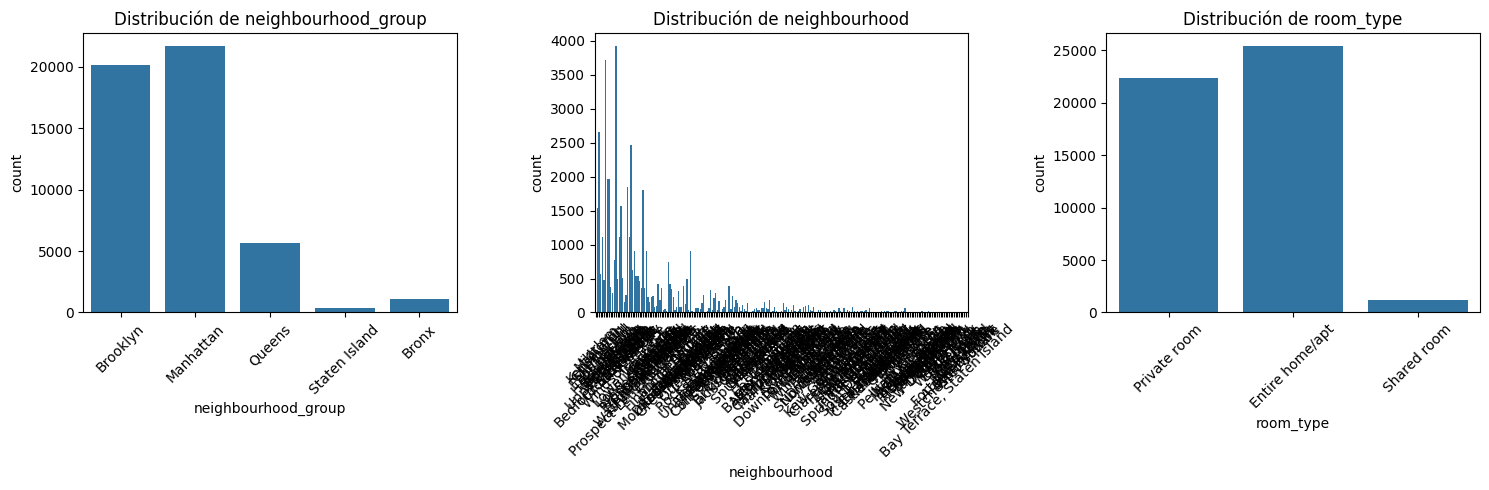

### 1.2.2 Variables Numéricas


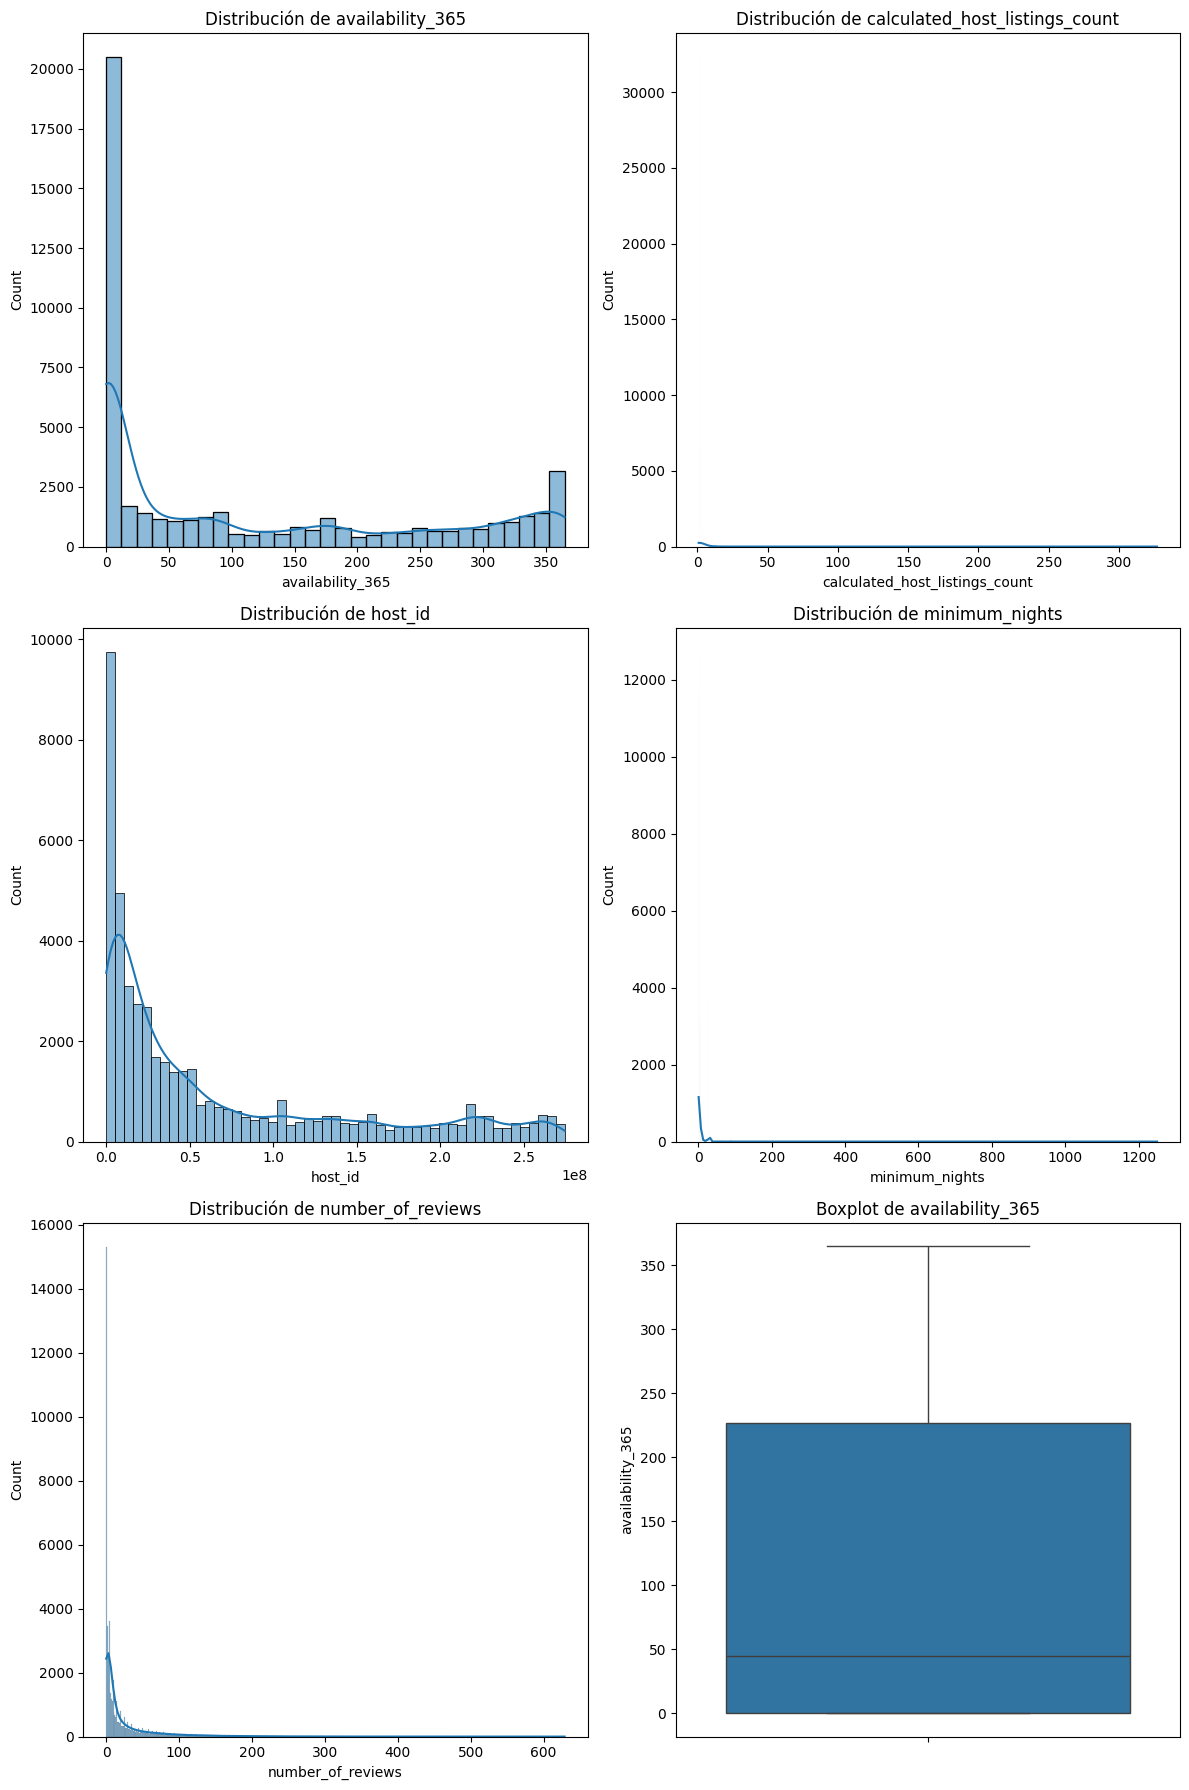

## 1.3 Análisis de variables Multivariadas
### 1.3.1 Numérico-numérico


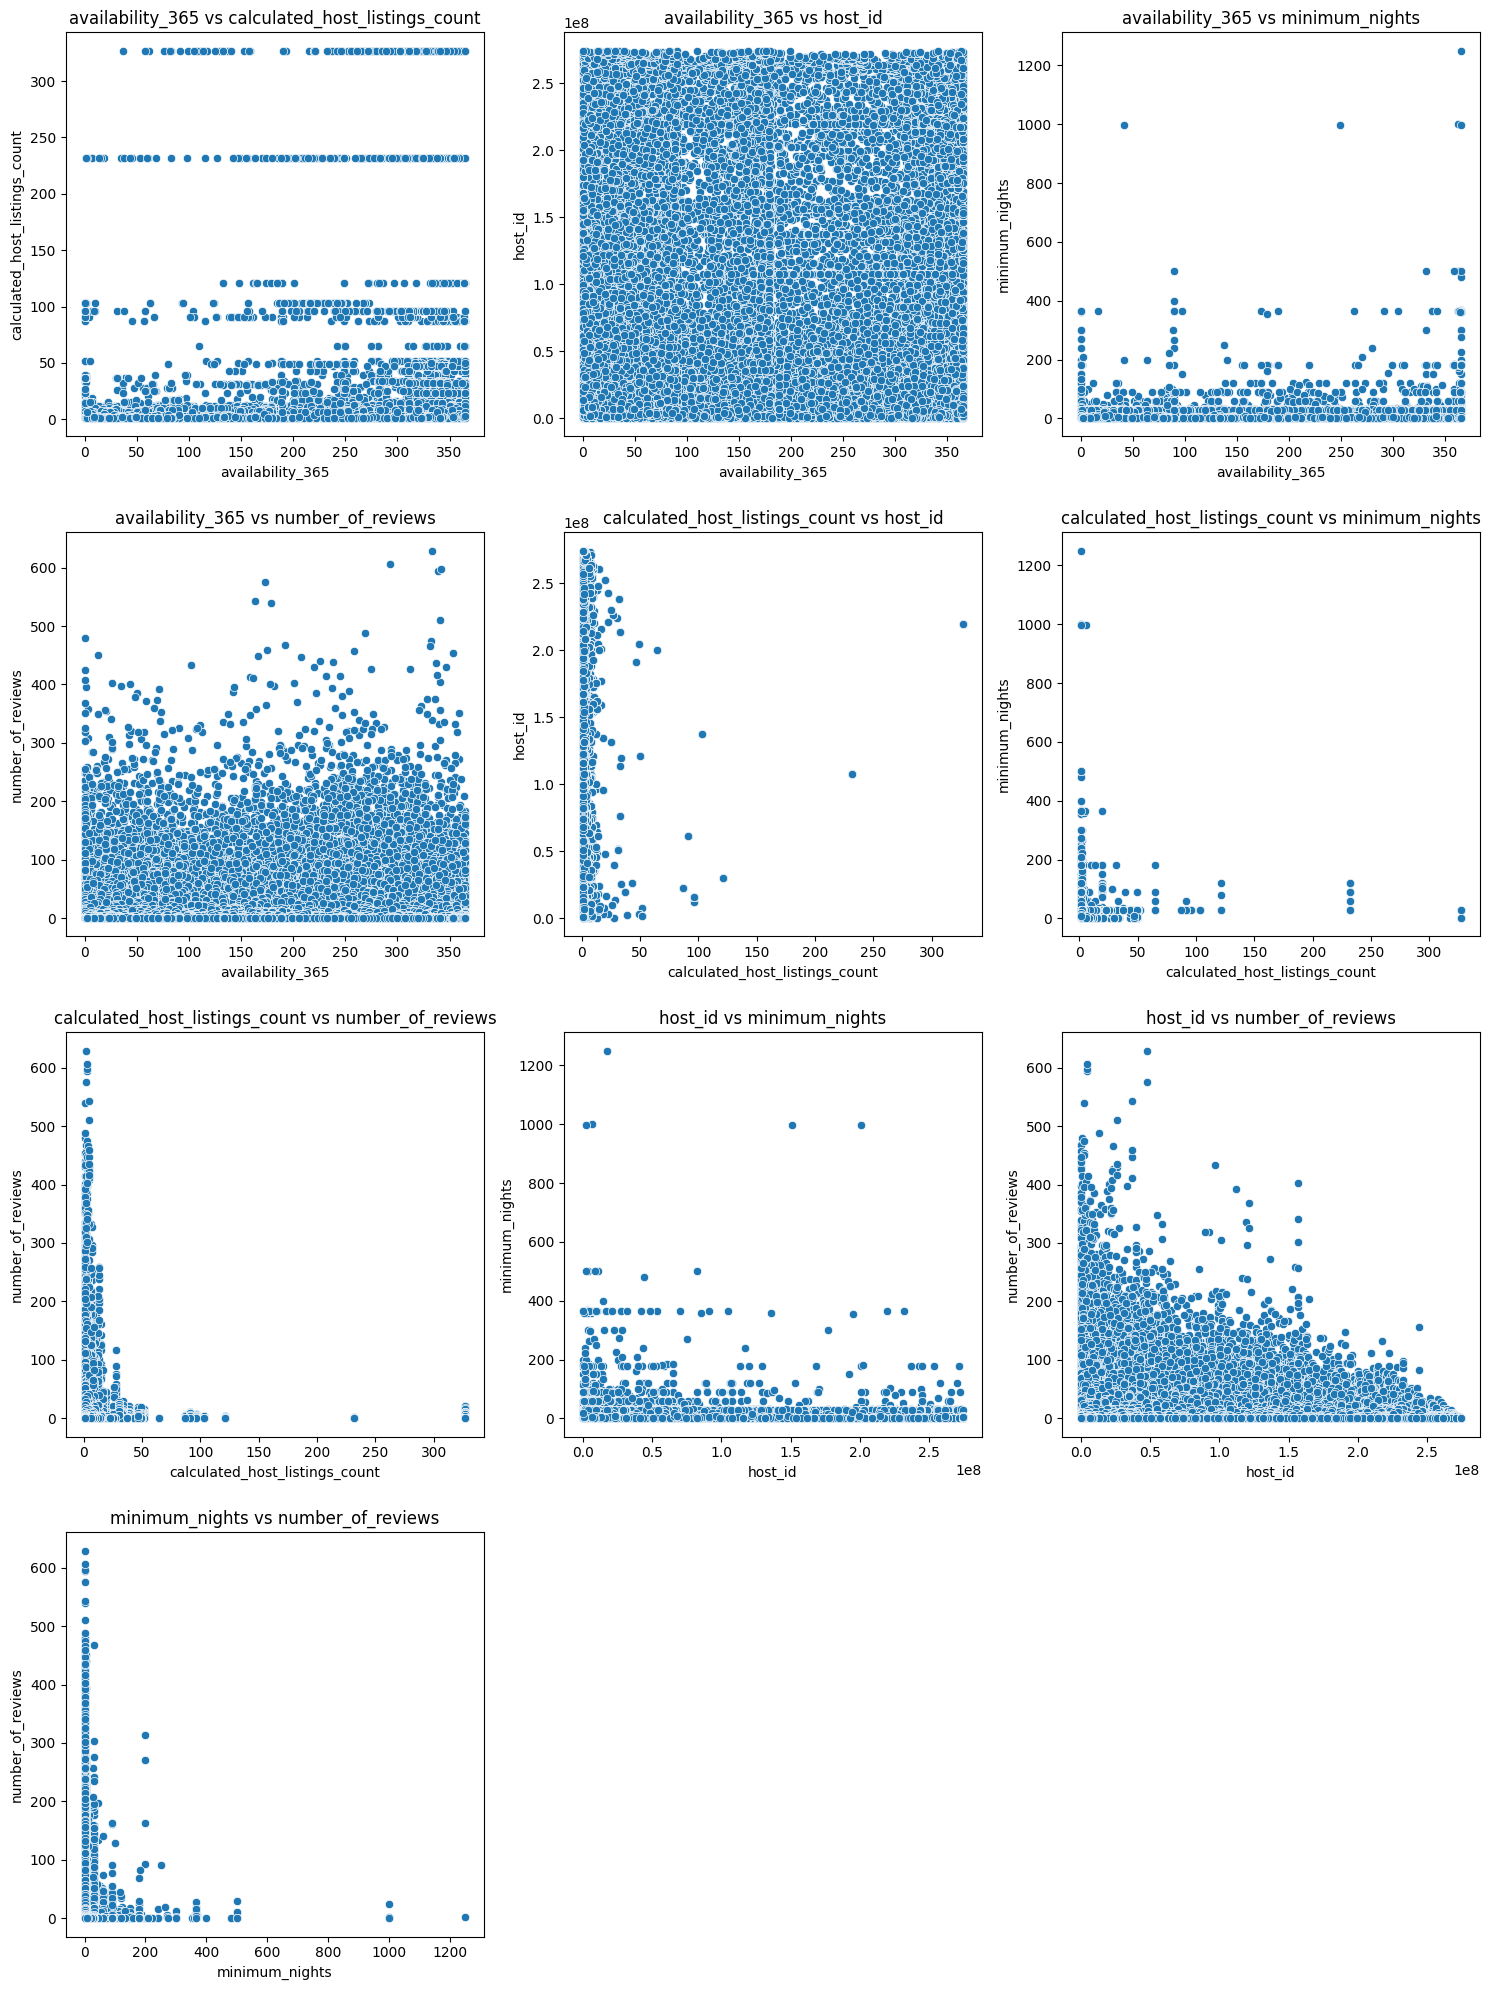

### 1.3.2 Categórico-categórico


/Users/joanafernandes/Data Science Bootcamp/Ejercicio EDA/eda_automatizado.py:148: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


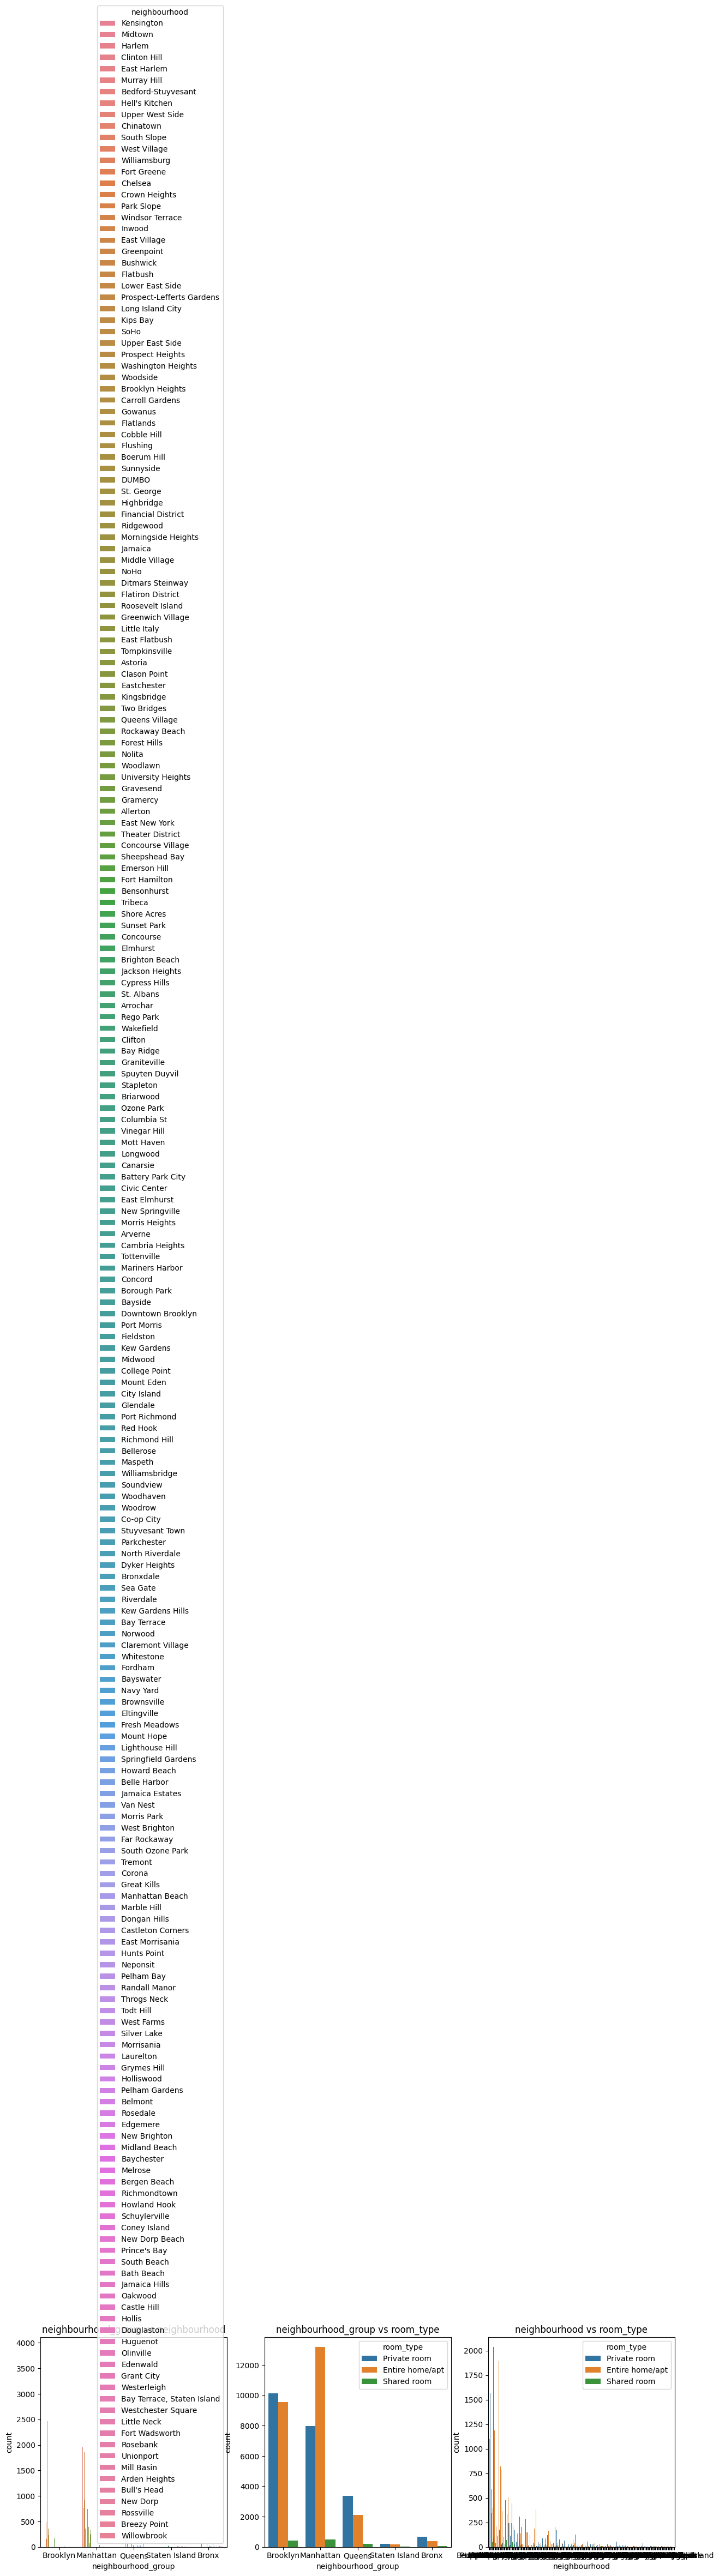

### 1.3.3 Combinaciones de la clase con varias predictoras


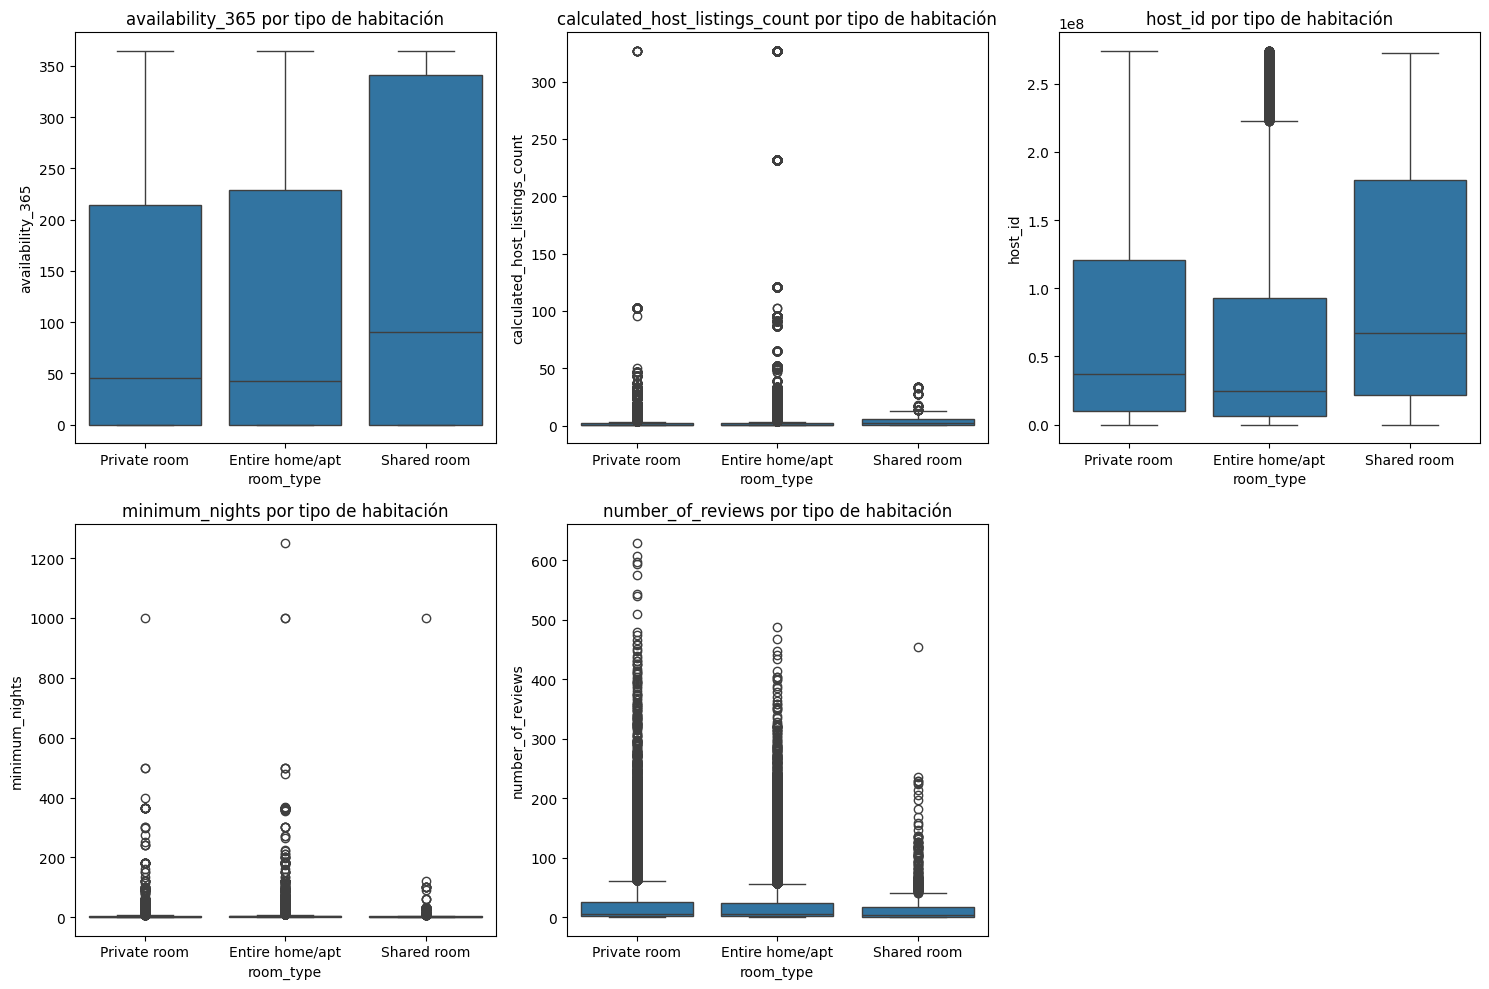

### 1.3.4 Análisis de correlaciones


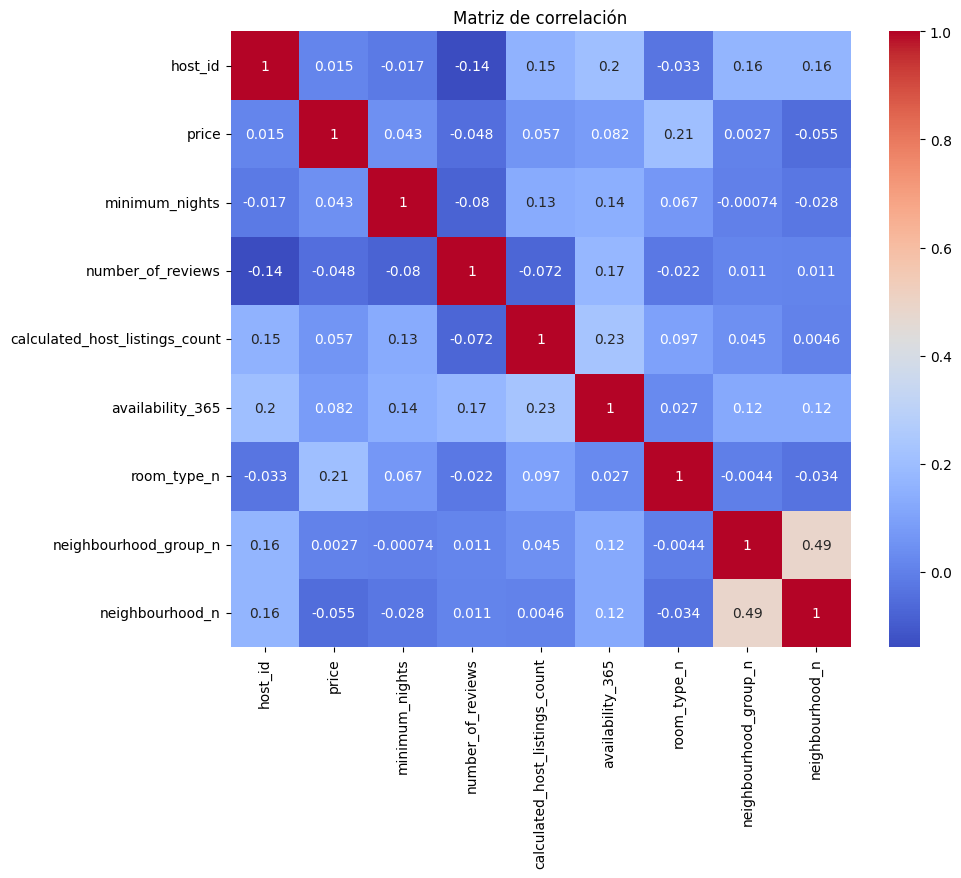

### 1.3.5 Categórico-numérico


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x0 with 0 Axes>

In [ ]:
import pandas as pd
from eda_automatizado import automated_eda  # Importa desde eda_automatizado.py

# Carga tus datos
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

# Llama a la función automated_eda
automated_eda(df)


In [78]:
#Prueba con k=5 para seleccionar las mejores variables para el modelo con outliers norm

modelo_seleccion = SelectKBest(f_classif, k = 5)
modelo_seleccion.fit(X_train_con_outliers_norm, y_train)

ix = modelo_seleccion.get_support()
x_train_sel = pd.DataFrame(modelo_seleccion.transform(X_train_con_outliers_norm), columns = X_train_con_outliers_norm.columns.values[ix])
x_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test_con_outliers_norm), columns = X_test_con_outliers_norm.columns.values[ix])

# GUARDAR LOS DATASETS

with open("feature_selection_k_5_norm.json", "w") as f:
    json.dump(list(x_train_sel.columns), f)

x_train_sel.head()

minimum_nights  calculated_host_listings_count  availability_365  \
0       -0.193025                       -0.186570         -0.852862   
1       -0.239596                       -0.186570         -0.860447   
2       -0.239596                       -0.156424         -0.860447   
3       -0.193025                       -0.186570          1.164663   
4       -0.099884                       -0.186570         -0.860447   

   room_type_n  neighbourhood_n  
0     0.798949        -0.514100  
1    -1.050482         0.005517  
2    -1.050482        -0.687306  
3     0.798949        -0.687306  
4    -1.050482         0.034385